In [2]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 6.9 MB/s eta 0:00:00


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import optuna
import imageio
from mpl_toolkits.mplot3d import Axes3D

In [9]:
def objective(trial):
    x = trial.suggest_float('x', -10, 10)
    return (x - 2) ** 2

study = optuna.create_study()
study.optimize(objective, n_trials=100)

best_params = study.best_params
print("Mejor valor de 'x':", best_params["x"])
print("Valor mínimo encontrado:", study.best_value)

[I 2024-03-13 21:01:41,642] A new study created in memory with name: no-name-5b7f1b8c-0fd3-4c12-9d8e-b0256e73c094
[I 2024-03-13 21:01:41,648] Trial 0 finished with value: 116.24639332223607 and parameters: {'x': -8.781762069450247}. Best is trial 0 with value: 116.24639332223607.
[I 2024-03-13 21:01:41,651] Trial 1 finished with value: 3.64676597388725 and parameters: {'x': 0.09034925342688638}. Best is trial 1 with value: 3.64676597388725.
[I 2024-03-13 21:01:41,653] Trial 2 finished with value: 110.28741146785198 and parameters: {'x': -8.501781347364455}. Best is trial 1 with value: 3.64676597388725.
[I 2024-03-13 21:01:41,655] Trial 3 finished with value: 24.956292951120705 and parameters: {'x': 6.995627383134245}. Best is trial 1 with value: 3.64676597388725.
[I 2024-03-13 21:01:41,659] Trial 4 finished with value: 12.71464890054657 and parameters: {'x': 5.565760634219096}. Best is trial 1 with value: 3.64676597388725.
[I 2024-03-13 21:01:41,661] Trial 5 finished with value: 29.662

Mejor valor de 'x': 1.9704971160095006
Valor mínimo encontrado: 0.0008704201637568648


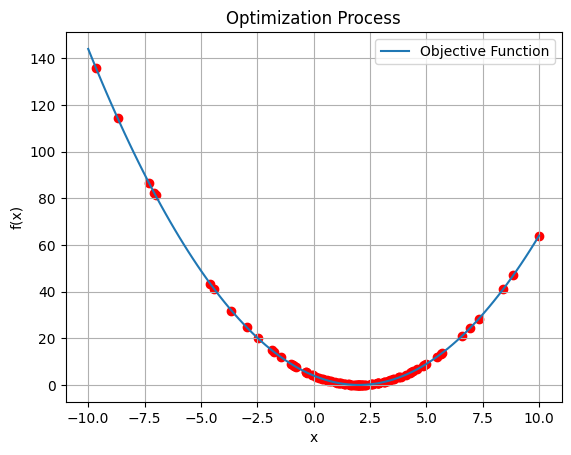

In [7]:
x_vals = np.linspace(-10, 10, 100)
y_vals = np.array([(x - 2) ** 2 for x in x_vals])

plt.plot(x_vals, y_vals, label='Objective Function')

for trial in study.trials:
    x = trial.params["x"]
    y = (x - 2) ** 2
    plt.scatter(x, y, color='r')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Optimization Process')
plt.legend()
plt.grid(True)

plt.show()

In [8]:
x_vals = np.linspace(-10, 10, 100)
y_vals = np.array([(x - 2) ** 2 for x in x_vals])

images = []

for i, trial in enumerate(study.trials):
    x = trial.params["x"]
    y = (x - 2) ** 2

    plt.plot(x_vals, y_vals, label='Objective Function')
    plt.scatter(x, y, color='r')

    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Optimization Process')
    plt.legend()
    plt.grid(True)

    filename = f"frame_{i}.png"
    plt.savefig(filename)

    plt.clf()

    images.append(imageio.imread(filename))

imageio.mimsave('optimization_process.gif', images)

<ipython-input-8-38587ee61b04>:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


<Figure size 640x480 with 0 Axes>

In [12]:
def objective(trial):
    x = trial.suggest_float('x', -10, 10)
    y = trial.suggest_float('y', -10, 10)
    return (x - 2) ** 2 + (y - 2) ** 2

study = optuna.create_study()
study.optimize(objective, n_trials=100)

best_params = study.best_params
print("Mejor valor de 'x':", best_params["x"])
print("Mejor valor de 'y':", best_params["y"])
print("Valor mínimo encontrado:", study.best_value)


[I 2024-03-13 21:07:53,188] A new study created in memory with name: no-name-cb8334b4-1024-4f9c-b85e-e473f39ef516
[I 2024-03-13 21:07:53,196] Trial 0 finished with value: 33.65148703506831 and parameters: {'x': 2.7360370468276685, 'y': 7.754106055745368}. Best is trial 0 with value: 33.65148703506831.
[I 2024-03-13 21:07:53,201] Trial 1 finished with value: 149.51961498048016 and parameters: {'x': 8.88954601806546, 'y': -8.102166631244929}. Best is trial 0 with value: 33.65148703506831.
[I 2024-03-13 21:07:53,205] Trial 2 finished with value: 36.16249172963443 and parameters: {'x': 0.19693538050422355, 'y': -3.7368501555781446}. Best is trial 0 with value: 33.65148703506831.
[I 2024-03-13 21:07:53,209] Trial 3 finished with value: 142.60846826407362 and parameters: {'x': -3.4552189855666304, 'y': -8.623043541452093}. Best is trial 0 with value: 33.65148703506831.
[I 2024-03-13 21:07:53,212] Trial 4 finished with value: 119.56132843007273 and parameters: {'x': -6.8841284727777925, 'y': 

Mejor valor de 'x': 1.8712790112738675
Mejor valor de 'y': 1.9104888090506549
Valor mínimo encontrado: 0.024581346243803245


In [13]:
x_vals = np.linspace(-10, 10, 100)
y_vals = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = (X - 2) ** 2 + (Y - 2) ** 2

images = []

for i, trial in enumerate(study.trials):
    x = trial.params["x"]
    y = trial.params["y"]
    z = (x - 2) ** 2 + (y - 2) ** 2

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
    ax.scatter(x, y, z, color='r', s=100)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    ax.set_title('Optimization Process')

    filename = f"frame_{i}.png"
    plt.savefig(filename)

    plt.clf()

    images.append(imageio.imread(filename))

imageio.mimsave('optimization_process_3d.gif', images)
print("Gif generado exitosamente.")

<ipython-input-13-e574869e1968>:29: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
<ipython-input-13-e574869e1968>:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(10, 7))


Gif generado exitosamente.


<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>